# Linear Regression  
  
Linear regression and linear model fitting is a essential tool in data analysis...   
Here we present a straightforward way of doing it with Python... with a pretty plot!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

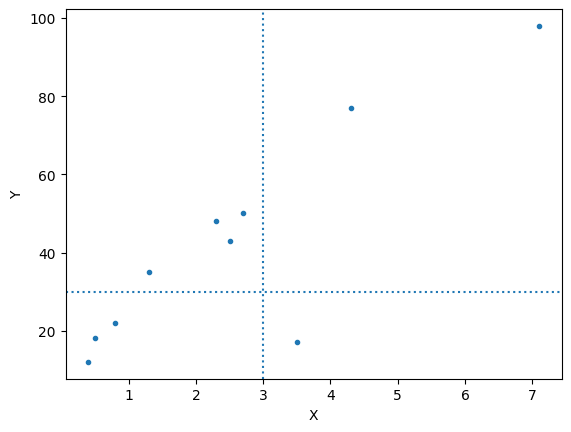

In [2]:
# pairs of any experimental results... 
# a simple plot already show us that there is a relationship between the two variables, and
# there is a clear 'outlier' that must be removed!

x = np.array([.4, .8, 1.3, 2.3, .5, np.nan, 4.3, 2.5, 7.1, 2.7, 3.5])
y = np.array([12, 22, 35, 48, 18, 20, 77, 43, 98, 50, 17])

plt.plot(x, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
# assessing the limits to be used to remove the spurious data (later)
plt.axvline(3, ls=':')
plt.axhline(30, ls=':')

In [3]:
# nan's must be removed from the data, however, both X and Y must keep its pairity! 
# if we remove a value of X, its Y pair also need to be removed!

def remove_nans(x,y):
    i = np.array(np.where(np.isnan(x) == False)).squeeze()
    x = x[i]
    y = y[i]
    i = np.array(np.where(np.isnan(y) == False)).squeeze()
    x = x[i]
    y = y[i]
    return x,y

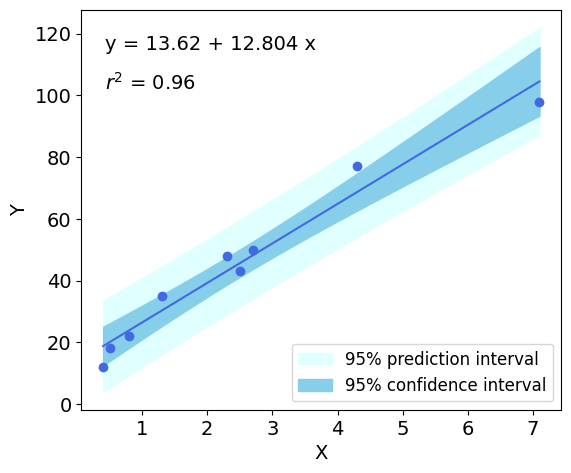

In [4]:
x,y = remove_nans(x,y)

# remove spurious value based on limits...
i = np.array( np.where((x > 3) & (y < 30))).squeeze()
x = np.delete(x, i)
y = np.delete(y, i)

slope, intercept = np.polyfit(x, y, 1)  # linear model adjustment

y_model = np.polyval([slope, intercept], x)   # modeling...

x_mean = np.mean(x)
y_mean = np.mean(y)
n = x.size                        # number of samples
m = 2                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = y - y_model

std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

# calculating the r2
# https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
# Pearson's correlation coefficient
numerator = np.sum((x - x_mean)*(y - y_mean))
denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2

# mean squared error (not used further... but here it is! :-/
MSE = 1/n * np.sum( (y - y_model)**2 )

# to plot the adjusted model
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = np.polyval([slope, intercept], x_line)

# confidence interval
ci = t * std_error * (1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5

# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5  

############### Ploting
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([.1, .1, .8, .8])

# data
ax.plot(x, y, 'o', color = 'royalblue')
# model
ax.plot(x_line, y_line, color = 'royalblue')
# confidence and prediction intervals
ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

ax.set_xlabel('X')
ax.set_ylabel('Y')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept,3))
b = str(np.round(slope,3))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

# add the equation and the r2
ax.text(.05, .9, 'y = ' + a + ' + ' + b + ' x', transform=ax.transAxes)
ax.text(.05, .8, '$r^2$ = ' + r2s , transform=ax.transAxes)

plt.legend(loc=4,fontsize=12)